In [1]:
import numpy as np
import pandas as pd
import os
from fastai.vision.all import *
import torch
import torchvision

# Display available datasets in the Kaggle environment
path = Path('models/animals/animals')

ModuleNotFoundError: No module named 'torchvision.models'

In [8]:


# Define Custom Data Augmentation Transformations
custom_transforms = aug_transforms(
    mult=1.0,
    max_rotate=20,       # Allow mild rotations
    max_zoom=1.5,        # Allow slight zoom
    max_warp=0.0,        # No perspective warping
    p_affine=0.75,       # Probability of affine transforms
    p_lighting=0.65      # Probability of lighting changes
)



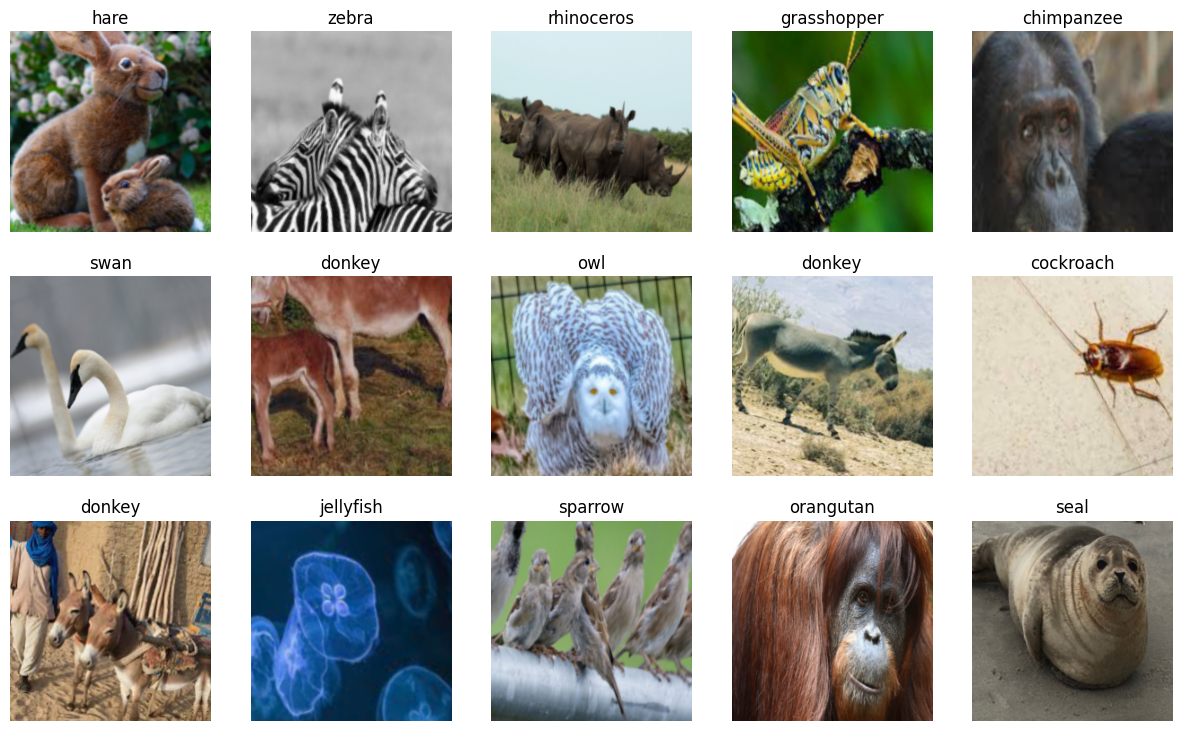

In [9]:
# Define DataBlock
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 80-20 split
    get_y=parent_label, 
    item_tfms=[Resize(224, method='squish')], # Resize images to 224x224
    batch_tfms=custom_transforms # Apply augmentations
).dataloaders(path, bs=32)  # Load data with batch size of 32

# Visualize a few images from the dataset
dls.show_batch(max_n=15)


In [10]:


# Import SaveModelCallback for tracking the best model
from fastai.callback.tracker import SaveModelCallback

# Define the CNN Model
learn = vision_learner(dls, resnet18, metrics=accuracy)



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/jarinthundathil/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 27.1MB/s]


In [15]:
import torch
print("PyTorch version:", torch.__version__)
print("MPS available:", torch.backends.mps.is_available())
print("MPS built:", torch.backends.mps.is_built())

PyTorch version: 2.3.1
MPS available: False
MPS built: False


In [11]:
import torch

# Check if MPS (Mac GPU) is available and move everything to MPS
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Load model on MPS
learn = vision_learner(dls, resnet18, metrics=accuracy).to(device)

# Train the Model with Fine-Tuning
learn.fine_tune(
    15,  # Train for (at most) 15 epochs
    cbs=[
        EarlyStoppingCallback(monitor='valid_loss', patience=4), # Stop early if no improvement
        SaveModelCallback(monitor='valid_loss', fname='animal_classifier_resnet18') # Save best model
    ]
)

epoch,train_loss,valid_loss,accuracy,time
0,2.562426,0.849657,0.775000,11:18


Better model found at epoch 0 with valid_loss value: 0.8496572375297546.


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 